In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


to numeric

In [3]:
data_onehot =  pd.get_dummies(data)
data_onehot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


create Train and Test set

In [4]:
X = data_onehot.drop('charges',axis=1) # axis1 = column 
y = data_onehot['charges']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.2, random_state=42
)


In [9]:
tf.random.set_seed(42)

insuarance_model = tf.keras.Sequential([
    tf.keras.Input(shape=(11,)),
    tf.keras.layers.Dense(100,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

insuarance_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

In [10]:
insuarance_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1200      
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = insuarance_model.fit(X_train, y_train, epochs=100, verbose=0) 

In [12]:
insuarance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3101.5598 - mae: 3101.5598


[3101.559814453125, 3101.559814453125]

Text(0.5, 0, 'epoch')

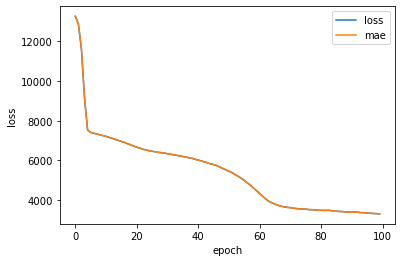

In [13]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epoch')

### Preprocessing (Normalization and Standradization)
* enhance model perfomance

In [14]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

Scale between 0 and 1 | and Text to numeric

In [99]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']), # between 0 to 1
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region']) # to numeric
)

X = data.drop('charges',axis = 1)
y = data['charges']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.2, random_state=42
)


# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [30]:
X_train.iloc[:3] 

,age,sex,bmi,children,smoker,region
560,46,female,19.95,2,no,northwest
1285,47,female,24.32,0,no,northeast
1142,52,female,24.86,0,no,southeast


In [31]:
X_train_normal[:3]

array([[0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ]])

In [286]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(11,)),
    tf.keras.layers.Dense(220,activation='relu'),
    tf.keras.layers.Dense(110,activation='relu'),
    tf.keras.layers.Dense(11,),
    tf.keras.layers.Dense(110,),
    tf.keras.layers.Dense(55,activation='relu'),
    tf.keras.layers.Dense(11,activation='relu'),
    tf.keras.layers.Dense(55),
    tf.keras.layers.Dense(11),
    tf.keras.layers.Dense(1)
])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mae'])

In [287]:
model.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_282 (Dense)           (None, 220)               2640      
                                                                 
 dense_283 (Dense)           (None, 110)               24310     
                                                                 
 dense_284 (Dense)           (None, 11)                1221      
                                                                 
 dense_285 (Dense)           (None, 110)               1320      
                                                                 
 dense_286 (Dense)           (None, 55)                6105      
                                                                 
 dense_287 (Dense)           (None, 11)                616       
                                                                 
 dense_288 (Dense)           (None, 55)              

In [288]:
history = model.fit(X_train_normal, y_train, epochs=100, verbose=1, callbacks=[lr_scheduler])
# history = model.fit(X_train_normal, y_train, epochs=100, verbose=1) 

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13345.9531 - mae: 13345.9531 - lr: 1.0000e-04
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13345.1729 - mae: 13345.1729 - lr: 1.1220e-04
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13340.8516 - mae: 13340.8516 - lr: 1.2589e-04
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13315.7119 - mae: 13315.7119 - lr: 1.4125e-04
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13163.1943 - mae: 13163.1943 - lr: 1.5849e-04
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 12240.5957 - mae: 12240.5957 - lr: 1.7783e-04
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 9059.6807 - mae: 9059.6807 - lr: 1.9953e-04
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7736.5371 - mae: 7736.5371 - lr: 2.2387e-04
Epoch 9/100
34/34 [==============================] -

In [289]:
loss, mae = model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8766.6953 - mae: 8766.6953


Text(0.5, 0, 'epoch')

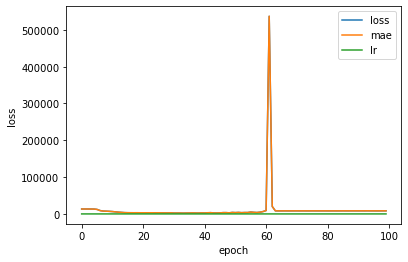

In [290]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epoch')

Change learning rate

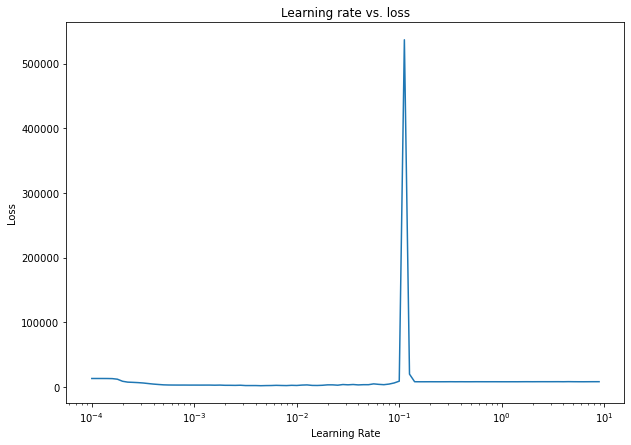

In [291]:
import numpy as np

# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

the 6e-4 is the best lr for this model

In [292]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(11,)),
    tf.keras.layers.Dense(220,activation='relu'),
    tf.keras.layers.Dense(110,activation='relu'),
    tf.keras.layers.Dense(11,),
    tf.keras.layers.Dense(110,),
    tf.keras.layers.Dense(55,activation='relu'),
    tf.keras.layers.Dense(11,activation='relu'),
    tf.keras.layers.Dense(55),
    tf.keras.layers.Dense(11),
    tf.keras.layers.Dense(1)
])


model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0006),
              metrics=['mae'])

history = model.fit(X_train_normal, y_train, epochs=100, verbose=1) 

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13341.2451 - mae: 13341.2451
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12973.0508 - mae: 12973.0508
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 8787.7168 - mae: 8787.7168
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7391.1387 - mae: 7391.1387
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 6621.1470 - mae: 6621.1470
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 5476.4800 - mae: 5476.4800
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 4499.1147 - mae: 4499.1147
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 3871.6409 - mae: 3871.6409
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 3383.3274 - mae: 3383.3274
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 3309.4749 - mae: 3309.

In [293]:
loss, mae = model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 1754.8580 - mae: 1754.8580
